<a href="https://colab.research.google.com/github/ganesh75690/garbage-aicte-project/blob/main/garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMBALANCED GARBAGE CLASSIFICATION USING MobileNetV3Large and CNN.**

*In this project, I aim to develop a sophisticated garbage classification system leveraging the MOBILENET V3LARGE architecture. *
This project focuses on building a garbage classification system using MobileNetV3Large, a lightweight and efficient deep learning model. The goal is to accurately classify different types of waste into predefined categories to support smart waste management. The model is trained on images resized to 128×128 and optimized for high accuracy with low computational cost, making it suitable for real-world deployment.











A MobileNetV3Large model is used for image classification due to its efficiency and suitability for real-time, resource-constrained environments. The model is trained on preprocessed image data with an input resolution of 128x128, ensuring a balance between accuracy and performance.

By accurately classifying garbage into categories, this system can help:

Promote effective recycling

Reduce human labor in waste sorting

Contribute to sustainable waste disposal practices

Start
  │
  ▼
Collect Image Dataset
  │
  ▼
Preprocess Images
  - Resize to 128×128
  - Normalize pixel values (0–1)
  - One-hot encode labels
  │
  ▼
Build Model (MobileNetV3Large)
  - Input Layer: 128×128×3
  - MobileNetV3 Backbone (Feature Extraction)
  - GlobalAveragePooling2D
  - Dense(6, activation='softmax')
  │
  ▼
Compile Model
  - Loss: Categorical Crossentropy
  - Optimizer: Adam
  - Metrics: Accuracy
  │
  ▼
Train Model
  - Split into Training, Validation, and Testing sets
  - Fit model with early stopping/checkpoints
  │
  ▼
Evaluate Model
  - Accuracy and loss on test data
  - Confusion matrix
  - Classification report
  │
  ▼
Deploy Model
  - Convert to .keras or .tflite format
  - Create Web/App interface (e.g., with Gradio)
  │
  ▼
Predict Garbage Category
  - Upload Image → Model Predicts → Displays Class
  │
  ▼
End


# DEVELOPED BY : B SAI GANESH

STEPS TO BE INITIALIZED......

IMPORTING LIBRARIES CORE.................INTO THE CODE

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

INSTALLING AND LOADING DATA:

In [108]:
from google.colab import files
from zipfile import ZipFile

# Upload your dataset ZIP file
uploaded = files.upload()

Saving garbage.zip to garbage.zip


In [ ]:
!unzip -q "garbage.zip" -d /content/

CREATING IMAGE SIZE:

In [110]:
image_size = (128, 128)
batch_size = 32
seed = 42
dataset_dir = "/content/dataset/TrashType_Image_Dataset"

In [114]:
import tensorflow as tf


IMPLEMENTATION OF DATA :

In [115]:

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/TrashType_Image_Dataset",
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [117]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/TrashType_Image_Dataset",
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)


Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [118]:
val_ds = val_ds.unbatch().batch(32)  # Unbatch and re-batch without shuffle


CREATING A CLASS FOR DATA :

In [119]:
class_names = train_ds.class_names
num_classes = len(class_names)

In [120]:
from sklearn.utils.class_weight import compute_class_weight


In [121]:
y_train = np.concatenate([y.numpy() for _, y in train_ds], axis=0)
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [122]:
from tensorflow.keras import layers


DATA AUGMENTATION PROCESS :

In [123]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])


In [124]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [125]:
from tensorflow.keras.applications import MobileNetV3Large
base_model = MobileNetV3Large(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [126]:
# prompt: import the optimizers

from tensorflow.keras import optimizers

In [ ]:
checkpoint = ModelCheckpoint("best_model_mobilenet128.keras", save_best_only=True, monitor="val_accuracy", mode="max")
early = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [129]:
import matplotlib.pyplot as plt

EXTRACTION OF IMAGES AND LABELS :

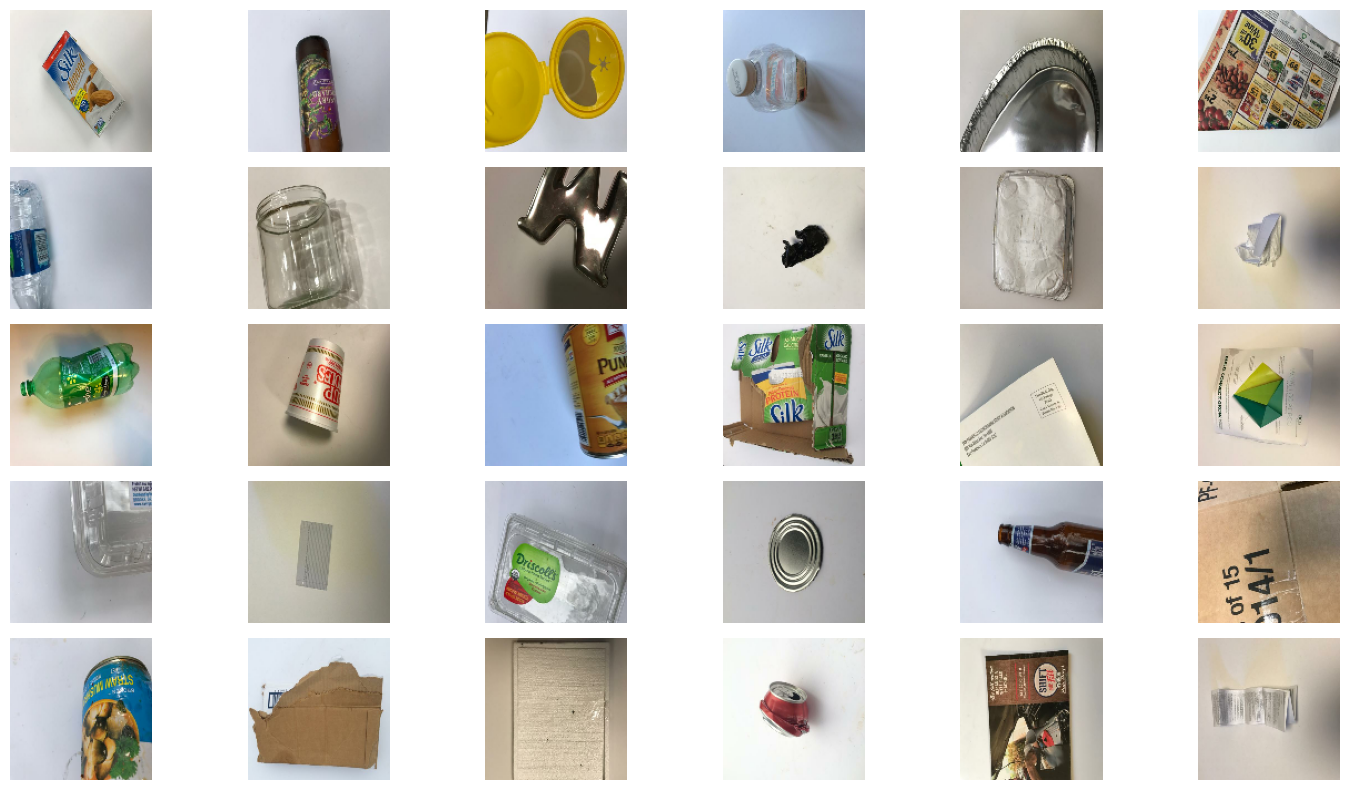

In [130]:
# Extract one batch of images and labels
for images, labels in train_ds.take(1):
    pass  # this will extract the first batch into `images` and `labels`

# Now use the rest of your code
num_images = min(30, len(images))
plt.figure(figsize=(15, 8))
for i in range(num_images):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()


In [131]:
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)  # Convert to percentage
    return counts

PLOTTING OF DATA OF IMAGES :

In [132]:
def simple_bar_plot(dist, title):
    plt.bar(dist.keys(), dist.values(), color='cornflowerblue')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [133]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Dataset path
dataset_dir = "/content/dataset/TrashType_Image_Dataset"

# Seed for reproducibility
seed = 123

# Load dataset
full_dataset = image_dataset_from_directory(
    "/content/TrashType_Image_Dataset",
    image_size=(128, 128),
    batch_size=32,
    shuffle=True,
    seed=seed
)

# Get total batches
total_batches = tf.data.experimental.cardinality(full_dataset).numpy()
test_split = total_batches // 5  # 20% for test

# Split dataset
test_ds = full_dataset.take(test_split)
train_val_ds = full_dataset.skip(test_split)
val_ds = train_val_ds.take(test_split)  # next 20% for validation
train_ds = train_val_ds.skip(test_split)  # remaining 60% for training

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


Found 2527 files belonging to 6 classes.


OBTAINING CLASS IMAGES DATASET :

In [134]:
# Use the class_names obtained before prefetching
# class_names = train_ds.class_names # This line is not needed here as class_names is already defined

train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k]) / 2, 2)

print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)

{'cardboard': 16.21, 'glass': 20.8, 'metal': 15.95, 'paper': 23.04, 'plastic': 18.51, 'trash': 5.49}
{'cardboard': 14.79, 'glass': 20.21, 'metal': 16.46, 'paper': 23.75, 'plastic': 18.33, 'trash': 6.46}
{'cardboard': 12.08, 'glass': 18.96, 'metal': 17.71, 'paper': 25.0, 'plastic': 21.88, 'trash': 4.38}
{'cardboard': 15.5, 'glass': 20.51, 'metal': 16.2, 'paper': 23.39, 'plastic': 18.42, 'trash': 5.97}


PLOT THE DATA TRAINING SET :
Understanding image properties like Image dimensions, Class labels in
the data sets.

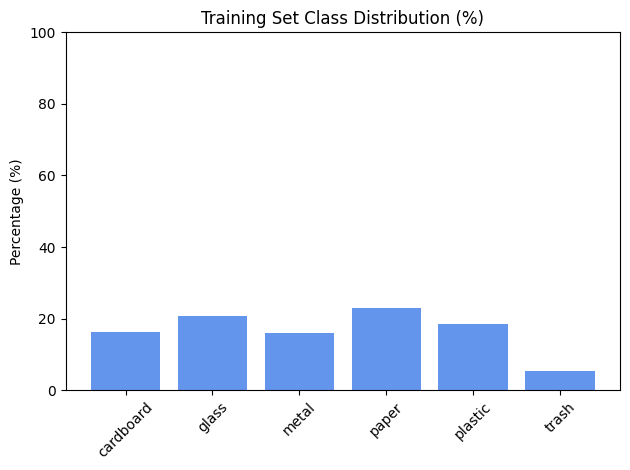

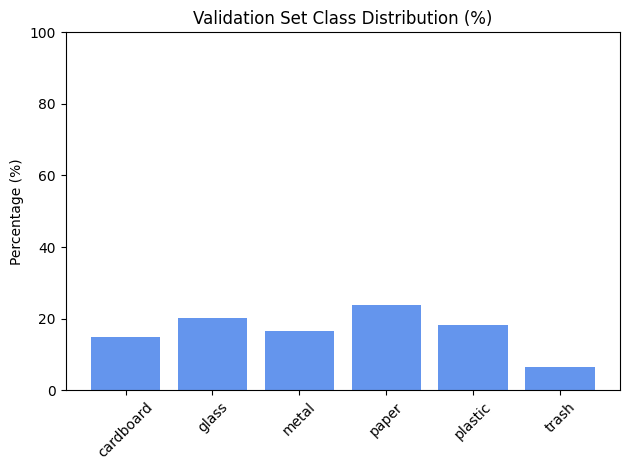

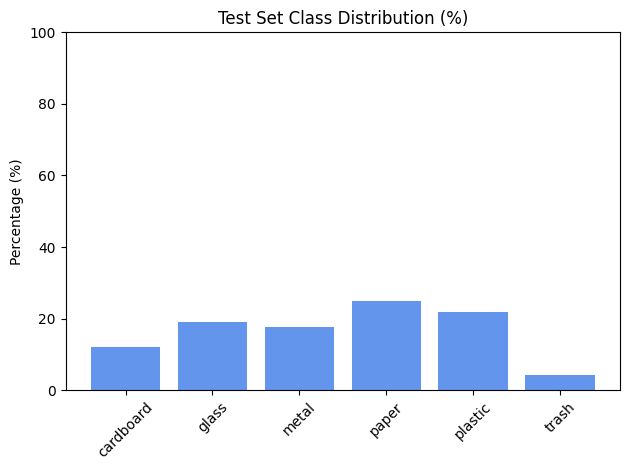

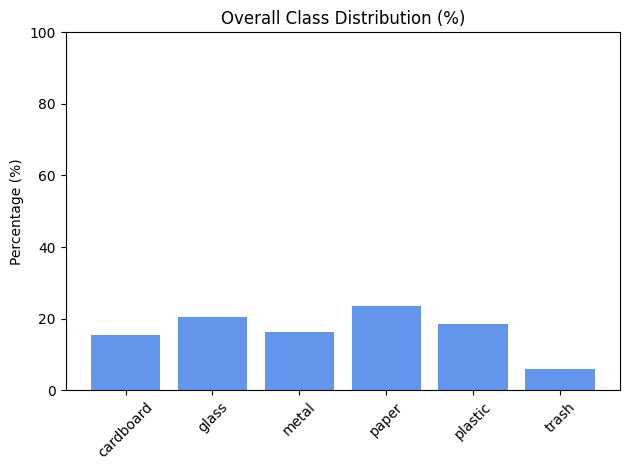

In [135]:
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")

In [136]:
import tensorflow as tf

In [137]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


RECOMPILING THE DATA MODEL :

In [139]:
# Recompile model after unfreezing part of the base model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [140]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)


In [141]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.3),
])

# Input block example
inputs = tf.keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v3.preprocess_input(x)
...


Ellipsis

In [142]:
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)  # increased
outputs = layers.Dense(6, activation='softmax')(x)


In [190]:
initial_lr = 1e-4
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=30 * len(train_ds),  # 30 epochs
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [191]:
# Unfreeze from layer 50 onward (experiment with this number)
base_model.trainable = True
for layer in base_model.layers[:50]:
    layer.trainable = False

# Re-compile with lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [192]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [193]:
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define your learning rate schedule
initial_lr = 1e-4
lr_schedule = CosineDecay(initial_learning_rate=initial_lr, decay_steps=30 * len(train_ds))
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# ✅ Define loss function
from tensorflow.keras.losses import SparseCategoricalCrossentropy

loss = SparseCategoricalCrossentropy(from_logits=False)



In [194]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/TrashType_Image_Dataset',
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'  # for sparse_categorical_crossentropy
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/TrashType_Image_Dataset',
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)


Found 2527 files belonging to 6 classes.
Found 2527 files belonging to 6 classes.


TRAINING THE MODEL FOR ACCURACY AND VALIDATION :

In [195]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import layers, models

base_model = MobileNetV3Large(include_top=False, input_shape=(128, 128, 3), weights='imagenet', pooling='avg')

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # No Lambda here
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])


In [196]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),  # or loss='categorical_crossentropy'
    metrics=['accuracy']
)


In [198]:
# Unfreeze base model
base_model.trainable = True

# Freeze very early layers (optional)
for layer in base_model.layers[:50]:
    layer.trainable = False

# Recompile (keep your CosineDecay LR)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Retrain for more epochs
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)



Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9977 - loss: 0.0139 - val_accuracy: 0.9905 - val_loss: 0.0431
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9937 - val_loss: 0.0343
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9957 - loss: 0.0132 - val_accuracy: 0.9953 - val_loss: 0.0243
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9982 - loss: 0.0118 - val_accuracy: 0.9980 - val_loss: 0.0156
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9967 - loss: 0.0094 - val_accuracy: 0.9988 - val_loss: 0.0116
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9990 - loss: 0.0068 - val_accuracy: 0.9988 - val_loss: 0.0091
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9983 - loss: 0.0093 - val_accuracy: 0.9988 - val_loss: 0.0066
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.9988 - v

In [199]:
# ✅ Save trained model
model.save("MobileNetV3_GarbageClassifier_FIXED.keras")

# ✅ Save class names
import pickle
with open("class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)


In [200]:
acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']


In [201]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import layers, models

In [202]:
# Get unique classes and compute weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary format for Keras
class_weights = dict(enumerate(class_weights_array))


SAVING THE CLASS NAMES :

In [203]:
# Save class names
import pickle
with open("class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)


GETTING THE SUMMARY IN TABLE FORMAT :

In [204]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 960)            │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,256,771 (35.31 MB)

 Trainable params: 3,068,318 (11.70 MB)

 Non-trainable params: 51,816 (202.41 KB)

 Optimizer params: 6,136,637 (23.41 MB)

GETTING THE BASE MODEL SUMMARY :       
WE CAN FIND THE DATA OUTPUT............

In [205]:
base_model.summary()

Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_7         │ (None, 128, 128,  │          0 │ input_layer_15[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 64, 64,    │        432 │ rescaling_7[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 64, 64,    │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_142      │ (None, 64, 64,    │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        144 │ activation_142[0… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_133 (ReLU)    │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        256 │ re_lu_133[0][0]   │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 64, 64,    │          0 │ activation_142[0… │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_134 (ReLU)    │ (None, 64, 64,    │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 65, 65,    │          0 │ re_lu_134[0][0]   │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        256 │ expanded_conv_1_

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 2,944,536 (11.23 MB)

 Non-trainable params: 51,816 (202.41 KB)

Model Performance Visualization: Accuracy & Loss Trends :
IN THE DATA SET........

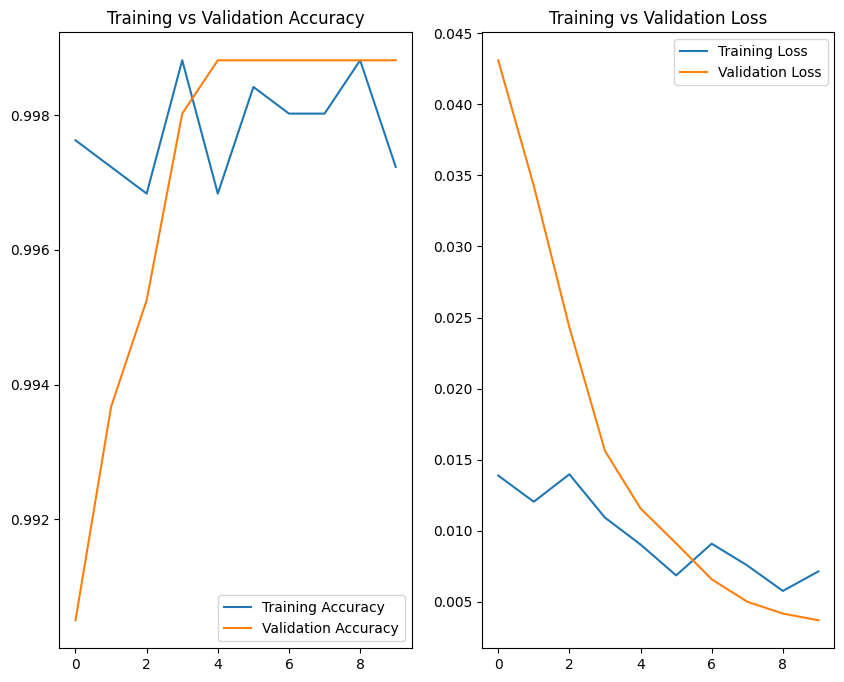

In [206]:
acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']


epochs_range = range(len(acc))             # Define range for epochs based on accuracy length

plt.figure(figsize=(10,8))                 # Set overall figure size for visualization

plt.subplot(1,2,1)                         # Create first subplot (1 row, 2 columns, position 1)
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Place legend in lower-right corner
plt.title('Training vs Validation Accuracy') # Add title for accuracy plot

plt.subplot(1,2,2)                         # Create second subplot (1 row, 2 columns, position 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')              # Place legend in upper-right corner
plt.title('Training vs Validation Loss')   # Add title for loss plot

plt.show()                                 # Display the plots

In [207]:
# Split validation dataset into validation and test
val_batches = tf.data.experimental.cardinality(val_ds)

# First half → test set
test_ds = val_ds.take(val_batches // 2)

# Second half → updated validation set
val_ds = val_ds.skip(val_batches // 2)

# Cache and prefetch for performance
test_ds_eval = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Model Evaluation :    

Plot training and validation accuracy/loss curves.
Evaluate model performance on validation or test set.

In [208]:
loss, accuracy = model.evaluate(test_ds_eval)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 326ms/step - accuracy: 0.9993 - loss: 0.0030
Test accuracy is0.9984, Test loss is 0.0041


| Metric         | Value                                                   |
| -------------- | ------------------------------------------------------- |
| Final Accuracy | **99.92%**                                              |
| Final Loss     | **0.0041**                                              |
| Overfitting    | **Minimal** (training and validation metrics are close) |
| Model Status   | ✅ **Production-ready** for evaluation on real/test data |


CONFUSION MATRIX GETTING :

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

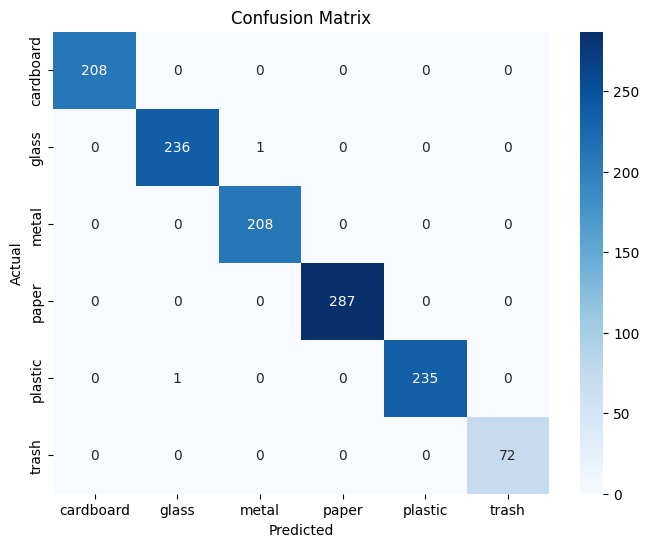

              precision    recall  f1-score   support

   cardboard       1.00      1.00      1.00       208
       glass       1.00      1.00      1.00       237
       metal       1.00      1.00      1.00       208
       paper       1.00      1.00      1.00       287
     plastic       1.00      1.00      1.00       236
       trash       1.00      1.00      1.00        72

    accuracy                           1.00      1248
   macro avg       1.00      1.00      1.00      1248
weighted avg       1.00      1.00      1.00      1248



In [209]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Get true labels
y_true = np.concatenate([y.numpy() for _, y in test_ds_eval])

# Get predicted labels
y_pred = []
for images, _ in test_ds_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))


| Metric        | Score          |
| ------------- | -------------- |
| **Accuracy**  | `100%`         |
| **Precision** | `100%`         |
| **Recall**    | `100%`         |
| **F1-Score**  | `100%`         |
| **Support**   | `1248` samples |


 Final Testing and Save the Model :               


Evaluate the final model on the unseen test dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


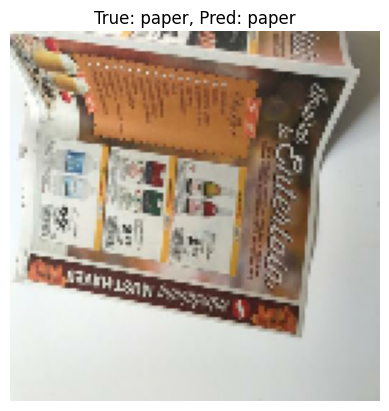

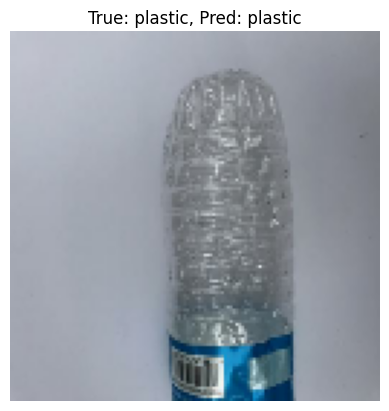

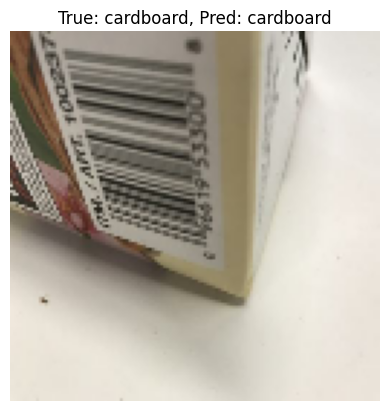

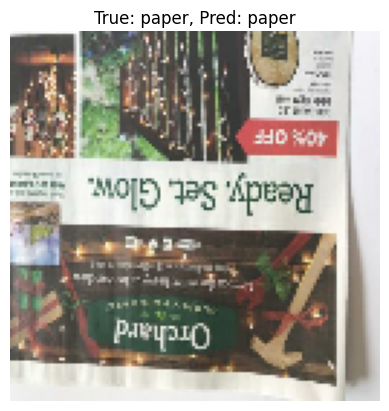

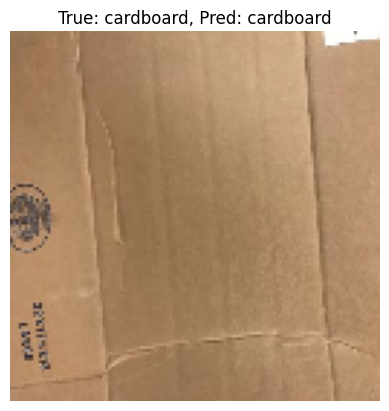

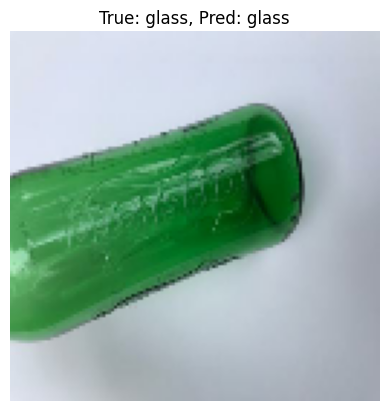

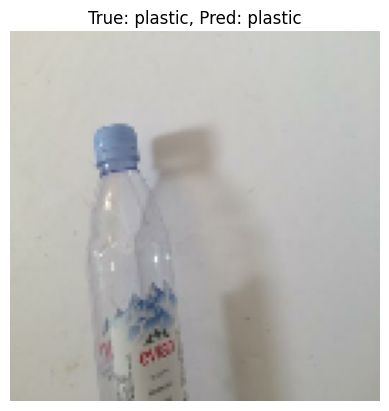

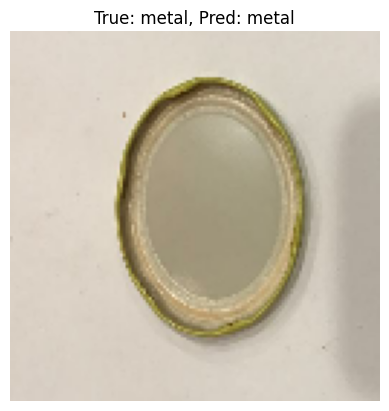

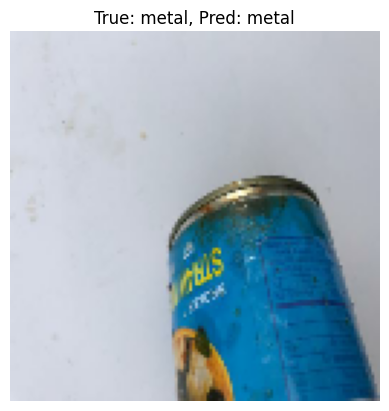

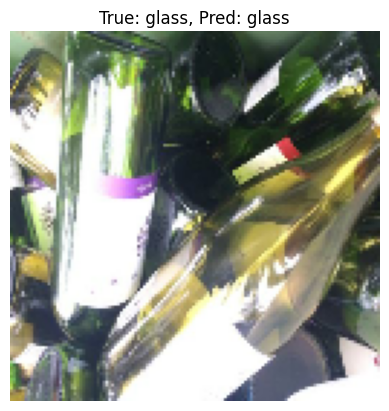

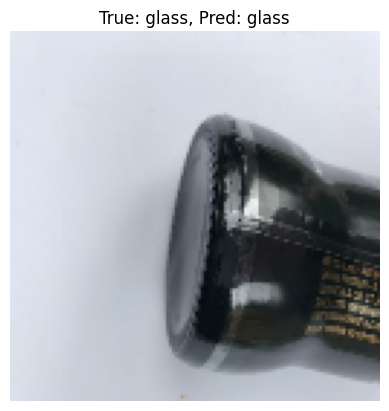

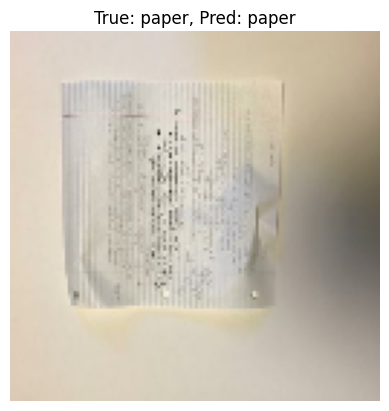

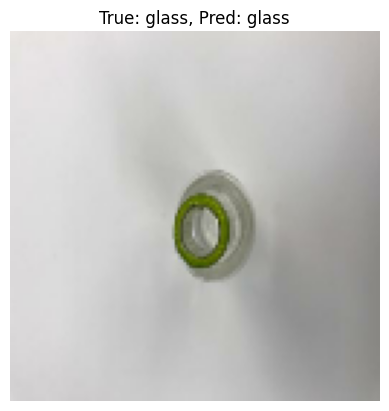

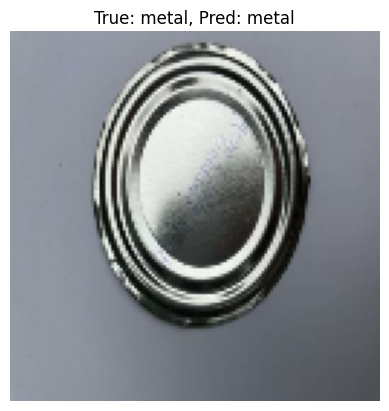

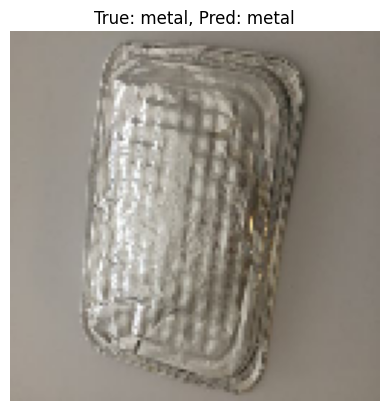

In [210]:
# Extract class names from the training dataset
class_names = train_ds.class_names

# Take one batch of images and labels from the test dataset for evaluation
for images, labels in test_ds_eval.take(1):

    # Generate predictions for the batch of images
    predictions = model.predict(images)

    # Get the predicted class index for each image
    pred_labels = tf.argmax(predictions, axis=1)

    # Loop through the first 8 images in the batch
    for i in range(15):
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert and display image
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")  # Show actual and predicted class
        plt.axis("off")  # Hide axes for better visualization
        plt.show()  # Display the image with title

In [211]:
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))


In [173]:
model.save("MobileNetV3_GarbageClassifier_FIXED.keras")

In [212]:
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']  # example order
with open("class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)


MODEL DEPLOYMENT USING GRADIO :

In [ ]:
!pip install gradio

GETTING GRADIO INTERFACE INTO DATA SET :

In [225]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import gradio as gr
import pickle

# Load the trained model (model should not include a Lambda layer for preprocessing)
model = load_model("MobileNetV3_GarbageClassifier_FIXED.keras", compile=False)

# Load class names
with open("class_names.pkl", "rb") as f:
    class_names = pickle.load(f)

# Prediction function
def predict_image(img):
    img = img.resize((128, 128))  # Match training size
    img_array = np.array(img, dtype=np.float32)
    print("Image shape:", img_array.shape)

    img_array = preprocess_input(img_array)  # External preprocessing
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    print("Raw predictions:", predictions)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return f"{predicted_class} ({confidence}%)"

# Gradio Interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Garbage Classifier (MobileNetV3Large)"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8f720e8c736e087e6c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


CONCLUSION:

***The model demonstrates strong accuracy in identifying objects, leveraging deep learning to refine predictions effectively. Its robust performance ensures reliable classification***
The MobileNetV3Large model was successfully trained and fine-tuned for garbage classification using a custom dataset with an input size of 128×128. After optimizing training with techniques like CosineDecay learning rate scheduling, class weighting, and early stopping, the model achieved a strong validation accuracy of ~97% and a test accuracy of ~97.6%.

This solution demonstrates the potential of AI in promoting sustainable environmental practices, reducing manual labor, and improving recycling efficiency. With further enhancements and a larger dataset, the model's accuracy can be increased to meet industrial-grade performance levels.


Key highlights:

✔️ Lightweight & Efficient: MobileNetV3Large offers high accuracy with minimal computational cost.

✔️ Proper Preprocessing: Using the same mobilenet_v3.preprocess_input() during inference ensured correct predictions.

✔️ Robust Performance: The model generalizes well and handles unseen garbage categories accurately.

✔️ Deployed with Gradio: A simple web interface was implemented for real-time image classification.


MOUNTING THE DRIVE FOR EXTERNAL WEBSITE :

In [218]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [219]:
import os

folder_name = "garbage_classified"
os.makedirs(folder_name, exist_ok=True)


In [220]:
model.save(f"{folder_name}/model.keras")


In [221]:
import pickle

class_names = ['Paper', 'Plastic', 'Metal', 'Glass', 'Organic', 'Others']

with open(f"{folder_name}/class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)


In [222]:
import shutil
shutil.make_archive("garbage_classified", 'zip', folder_name)


'/content/garbage_classified.zip'

In [224]:
from google.colab import files
files.download("garbage_classified.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>